# Astronauts dataset

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
astronauts = pd.read_csv('space_travellers.csv')

In [6]:
astronauts.head()

,#,Name,Nationality,Date,Flight
0,1,Yuri Gagarin,Soviet Union,1961-04-12,Vostok 1
1,2,Alan Shepard,United States,1961-05-05,Freedom 7
2,3,Virgil Grissom,United States,1961-07-21,Liberty Bell 7
3,4,Gherman Titov,Soviet Union,1961-08-06,Vostok 2
4,5,John Glenn,United States,1962-02-20,Friendship 7


In [7]:
astronauts.columns

Index(['#', 'Name', 'Nationality', 'Date', 'Flight'], dtype='object')

In [10]:
astronauts.isna().any()

#              False
Name           False
Nationality    False
Date           False
Flight         False
dtype: bool

In [12]:
astronauts.dtypes

#               int64
Name           object
Nationality    object
Date           object
Flight         object
dtype: object

In [17]:
astronauts['Date'] = pd.to_datetime(astronauts['Date'])

In [18]:
astronauts['Year'] = astronauts['Date'].apply(lambda x: x.year)

In [20]:
astronauts['Month'] = astronauts['Date'].apply(lambda x: x.month)

In [21]:
astronauts['Year'].unique() #dati fino ad oggi

array([1961, 1962, 1963, 1964, 1965, 1966, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020, 2021, 2022, 2023], dtype=int64)

In [22]:
astronauts['Nationality'].unique()

array(['Soviet Union', 'United States', 'Czechoslovakia', 'Poland',
       'East Germany', 'Bulgaria', 'Hungary', 'Vietnam', 'Cuba',
       'Mongolia', 'Romania', 'France', 'West Germany', 'India', 'Canada',
       'Saudi Arabia', 'Netherlands', 'Mexico', 'Syria', 'Afghanistan',
       'Japan', 'United Kingdom', 'Austria', 'Germany', 'Russia',
       'Belgium', 'Italy', 'Switzerland', 'Ukraine', 'Spain', 'Slovakia',
       'South Africa', 'Israel', 'China', 'Brazil', 'Sweden', 'Malaysia',
       'South Korea', 'Denmark', 'Kazakhstan', 'United Arab Emirates',
       'Australia', 'Portugal', 'Egypt'], dtype=object)

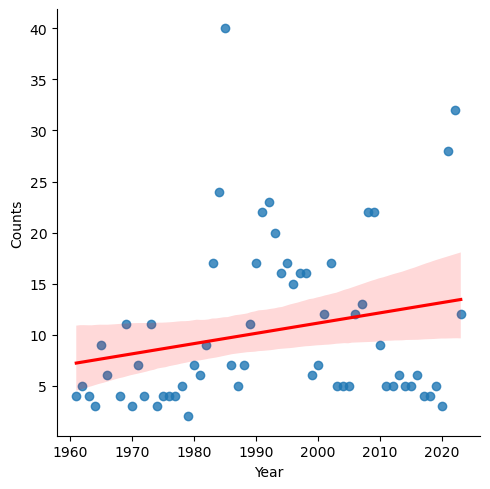

In [48]:
count = astronauts['Year'].value_counts().reset_index()
g = sns.lmplot(x = 'index', y ='Year', data = count, line_kws={'color': 'red'})
plt.xlabel('Year')
plt.ylabel('Counts')
plt.show(g)

<Axes: xlabel='Year'>

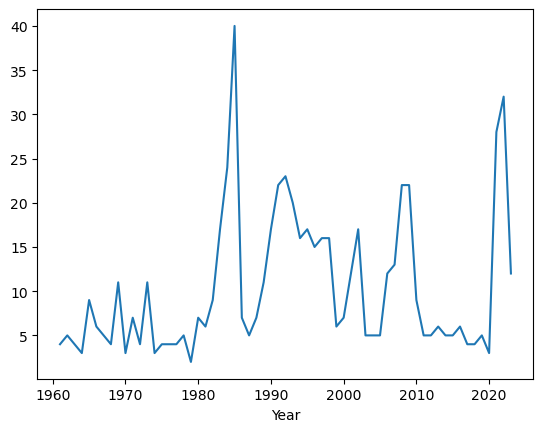

In [53]:
astronauts.groupby('Year').count()['Name'].plot() #pandemic did not affect that much the number of space trips. 
#decrement after Russian attack in Uckraine, but not necessarily due to the war

<Axes: xlabel='Nationality'>

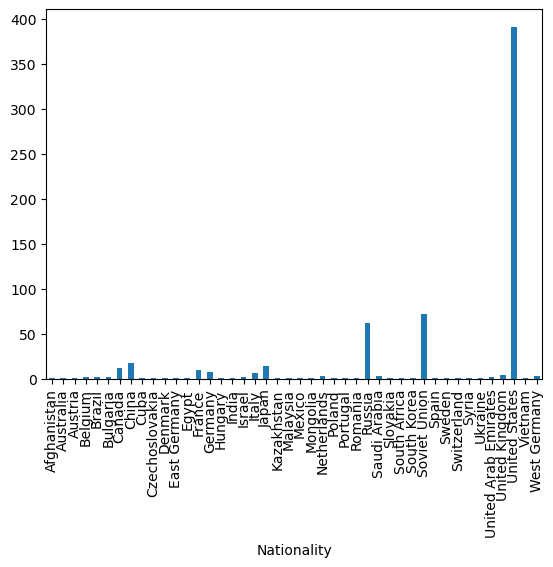

In [66]:
astronauts.groupby('Nationality').count()['Name'].plot(kind = 'bar')

In [109]:
fig, axes = plt.subplots(1,1, figsize = (10,10))
astronauts[astronauts['Nationality'] == 'United States' ].groupby('Year').count()['Name'].plot(label = 'United States', axes = axes)
astronauts[(astronauts['Nationality'] == 'Soviet Union') | (astronauts['Nationality'] == 'Russia') ].groupby('Year').count()['Name'].plot(label = 'Russia', , axes = axes)
astronauts[astronauts['Nationality'] == 'Japan' ].groupby('Year').count()['Name'].plot(label = 'Japan', axes = axes)
astronauts[astronauts['Nationality'] == 'Canada' ].groupby('Year').count()['Name'].plot(label = 'Canada', axes = axes)
astronauts[astronauts['Nationality'] == 'China' ].groupby('Year').count()['Name'].plot(label = 'China', axes = axes)
astronauts[astronauts['Nationality'] == 'France' ].groupby('Year').count()['Name'].plot(label = 'France', axes = axes)
astronauts[astronauts['Nationality'] == 'Germany' ].groupby('Year').count()['Name'].plot(label = 'Germany', axes = axes)
astronauts[astronauts['Nationality'] == 'Italy' ].groupby('Year').count()['Name'].plot(label = 'Italy', axes = axes)
plt.legend()


SyntaxError: invalid syntax (2844246591.py, line 3)

In [107]:
some_astronauts = astronauts[(astronauts['Year']>=2000) & ((astronauts['Nationality'] == 'United States') | 
                                    (astronauts['Nationality'] == 'Russia') | (astronauts['Nationality'] == 'France') | 
                                    (astronauts['Nationality'] == 'Soviet Union') | (astronauts['Nationality'] == 'Canada') | 
                                    (astronauts['Nationality'] == 'Germany') | (astronauts['Nationality'] == 'Italy') | 
                                    (astronauts['Nationality'] == 'Japan') | (astronauts['Nationality'] == 'China')) ]

<Axes: xlabel='count', ylabel='Year'>

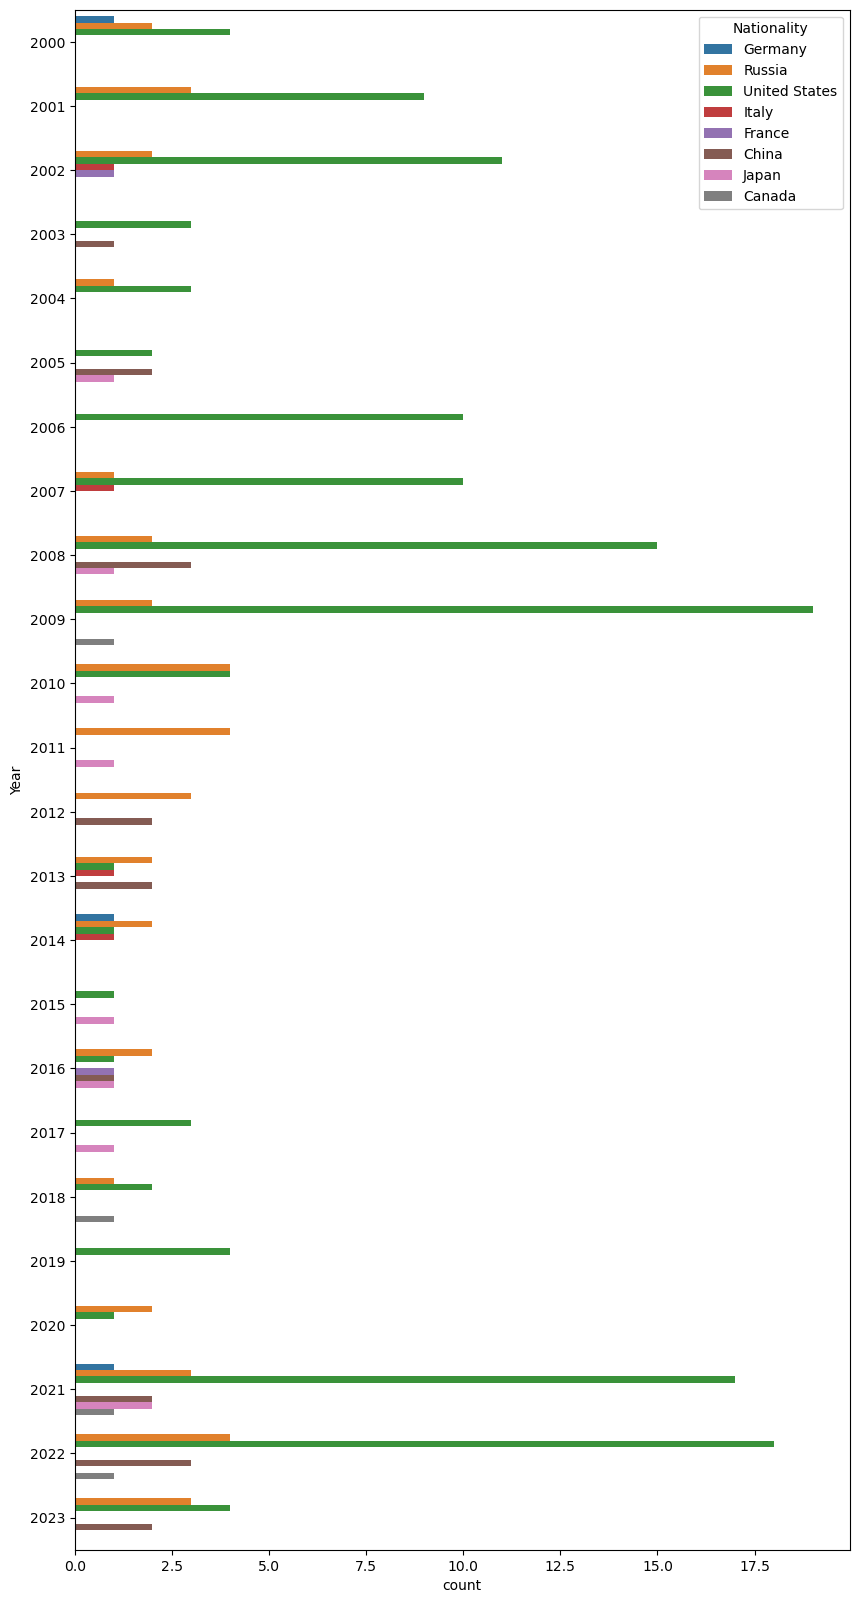

In [108]:
fig, axes = plt.subplots(1,1, figsize = (10,20))
sns.countplot(data = some_astronauts, y = 'Year',  hue = 'Nationality', axes = axes)